In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [24]:
# Read and prepare the data
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
newData = newData.drop_duplicates()
newData = newData.asfreq('H')
newData = newData.fillna(method='ffill')

In [25]:
# Split the data into training and testing sets
split_date = '2015-09-30'
train = newData.loc[:split_date]
test = newData.loc[split_date:]

In [26]:
# Create a Prophet model and fit it to the training data
model = Prophet()
model.add_country_holidays(country_name='US')
train_df = pd.DataFrame({'ds': train.index, 'y': train['Office_Garman']})
model.fit(train_df)

18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:27 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Make predictions on the testing data
future = pd.DataFrame({'ds': test.index})
forecast = model.predict(future)

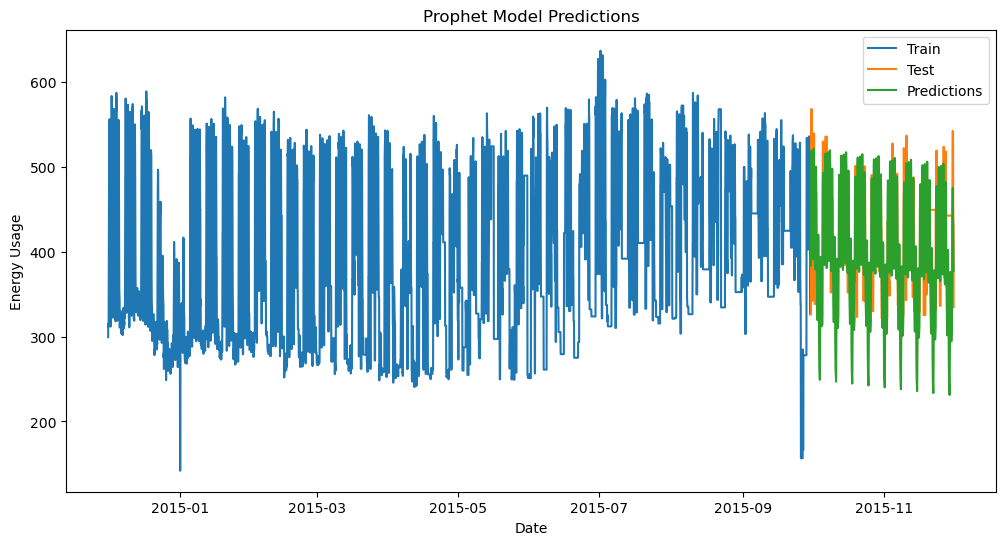

In [28]:
# Plotting the actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Prophet Model Predictions')
plt.legend()
plt.show()

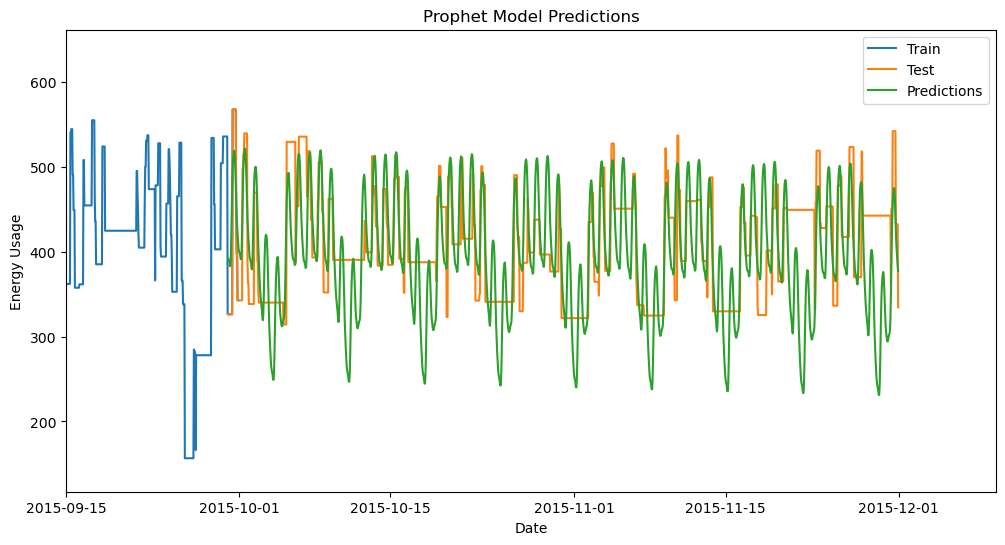

In [29]:
# Define the date range for zooming in
zoom_start_date = pd.to_datetime('2015-09-15')
zoom_end_date = pd.to_datetime('2015-12-10')

# Plotting the actual data and predictions with zoom
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Prophet Model Predictions')
plt.xlim(zoom_start_date, zoom_end_date)  # Set the x-axis limits for zooming
plt.legend()
plt.show()


In [30]:
import numpy as np

# Reset the index of the test dataframe
test = test.reset_index(drop=True)

# Calculate MAE
mae = np.mean(np.abs(test['Office_Garman'] - forecast['yhat']))
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
mape = np.mean(np.abs(test['Office_Garman'] - forecast['yhat']) / test['Office_Garman']) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate RMSE
rmse = np.sqrt(np.mean((test['Office_Garman'] - forecast['yhat'])**2))
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 47.22322222717902
Mean Absolute Percentage Error (MAPE): 11.7399964440218
Root Mean Squared Error (RMSE): 63.015404729885375
